In [1]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch

#Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using device:", device)

using device: cuda


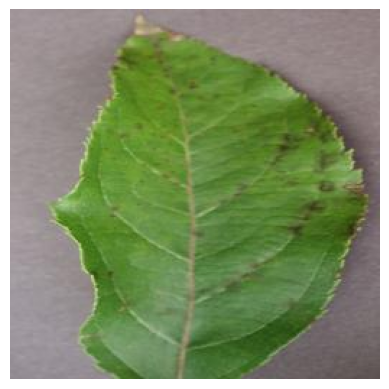

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
img = Image.open('uploaded_image.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
!unzip PlantVillage.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11030437-942c-4cb4-a40e-b35236778a4b___UF.GRC_YLCV_Lab 02923.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1104914f-f715-4b02-b551-5cdf03f54bcb___YLCV_NREC 2717.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11061195-ce9c-4171-819d-663342a186e8___YLCV_NREC 0257.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/110c50e6-039e-4f32-bda1-26262968ab8a___YLCV_GCREC 5539.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1114e83e-5477-483c-8bed-847b2c169c9f___YLCV_NREC 2257.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/111d4096-e9eb-4f32-9a25-f3c19b92c627___YLCV_GCREC 2209.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1126f296-0c84-4f9d-b66b-1e9a91794ec9___UF.GRC_YLCV_Lab 09340.JPG  
  inflating: PlantVillage/Tomato___Tomato_Yellow_Leaf_Curl

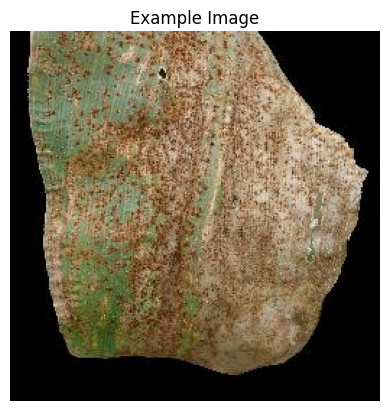

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Example: Look at one random image
folder = "PlantVillage"  # change if your path is different
class_folder = os.path.join(folder, os.listdir(folder)[0])  # first class
image_file = os.path.join(class_folder, os.listdir(class_folder)[0])

img = Image.open(image_file)

plt.imshow(img)
plt.axis('off')
plt.title("Example Image")
plt.show()

Create Data Transforms

In [18]:
from torchvision import datasets, transforms

# Define image size
IMG_SIZE = 224  # standard size for ViT/Swin

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),  # converts to tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # normalize to [-1,1]
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

Load the Dataset with Transformations

In [19]:
from torch.utils.data import DataLoader, random_split

# Path to the dataset
dataset_path = '/content/PlantVillage'

# Create dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=train_transform)

# Split into train/test
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * (IMG_SIZE // 4) * (IMG_SIZE // 4), 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [21]:
num_classes = len(full_dataset.classes)
print("Number of classes:", num_classes)


Number of classes: 38


In [22]:
model = SimpleCNN(num_classes=num_classes).to(device)


In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
# Number of epochs
epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # zero the parameter gradients

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Finished Training!")

Epoch [1/5], Loss: 1.4754
Epoch [2/5], Loss: 0.8334
Epoch [3/5], Loss: 0.6807
Epoch [4/5], Loss: 0.5902
Epoch [5/5], Loss: 0.5439
Finished Training!


Execution time is 14 minutes. Loss is dropping! That's good!

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(all_labels, all_preds)
    print(cm)

# Now run:
evaluate_model(model, test_loader)


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.69      0.66      0.67       116
                                 Apple___Black_rot       0.86      0.81      0.83       108
                          Apple___Cedar_apple_rust       0.73      0.50      0.59        54
                                   Apple___healthy       0.77      0.83      0.80       333
                               Blueberry___healthy       0.85      0.96      0.90       300
          Cherry_(including_sour)___Powdery_mildew       0.86      0.96      0.91       196
                 Cherry_(including_sour)___healthy       0.96      0.76      0.85       193
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.37      0.51       103
                       Corn_(maize)___Common_rust_       0.95      0.98      0.97       242
               Corn_(maize)___Northern_Leaf_Blight      

CNN has .88 accuracy. Let's try ViT.

In [27]:
!pip install transformers timm


In [29]:
from transformers import ViTForImageClassification, ViTImageProcessor

# Load the image processor
image_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Load the pretrained ViT model and adapt it for 38 classes
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=num_classes,
    ignore_mismatched_sizes=True  # This lets it replace the classification head
).to(device)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([38]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([38, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
from torchvision import transforms

IMG_SIZE = 224  # for ViT

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])


In [31]:
# Reload dataset with new ViT transforms
full_dataset = datasets.ImageFolder(root=dataset_path, transform=train_transform)

# Re-split
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# New dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [32]:
from torch.optim import AdamW

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)  # smaller learning rate for ViT

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs).logits  # <-- important! use .logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Finished Fine-tuning Vision Transformer!")


Epoch [1/5], Loss: 0.2699
Epoch [2/5], Loss: 0.0191
Epoch [3/5], Loss: 0.0115
Epoch [4/5], Loss: 0.0082
Epoch [5/5], Loss: 0.0059
Finished Fine-tuning Vision Transformer!


Execution time for fine-tuning ViT was 2 hours. Great results. Losses were reduced with each Epoch.

Save model

In [33]:
torch.save(model.state_dict(), 'vit-plantvillage.pth')


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
!cp vit-plantvillage.pth /content/drive/MyDrive/


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            logits = outputs.logits  # <--- Get the logits tensor from the Hugging Face output
            _, preds = torch.max(logits, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(all_labels, all_preds)
    print(cm)

In [39]:
evaluate_model(model, test_loader)


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.98      0.99       126
                                 Apple___Black_rot       0.99      0.99      0.99       123
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        66
                                   Apple___healthy       1.00      0.97      0.98       322
                               Blueberry___healthy       1.00      1.00      1.00       312
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       207
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       183
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.93      0.95       112
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       225
               Corn_(maize)___Northern_Leaf_Blight      

Accuracy was excellent! Model looks good.

I need the list of class names in the order that they were trained.

In [42]:
print(full_dataset.classes)



['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp